# HR Analytics Project- Understanding the Attrition in HR


Data description

HR Analytics

Attrition in HR

Attrition affecting Companies

# Importing necessary libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

importing dataset

In [3]:
ds=pd.read_csv("IBM_HR-Employee-Attrition.csv")
ds.head()


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
ds

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51

In [6]:
ds.shape

(1470, 35)

In [7]:
ds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#droping not necessary coulumns and also those which are with homogineous data
ds.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'],inplace=True,axis=1)

In [10]:
ds

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51

In [11]:
ds.shape

(1470, 31)

In [12]:
ds.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

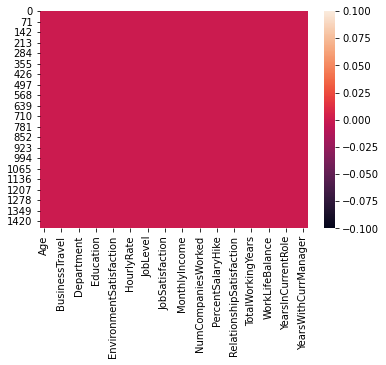

In [13]:
#we see there is no null values in the data
sns.heatmap(ds.isnull())

no null values in the data also shown in heatmap

In [14]:
#stastical summary
ds.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      1470.000000    1470.000000  ...        1470.000000   
mean          2.728571    6502.931293  ...           3.153741   
std           1.102846    4707.956783  ...           0.360824   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2911.000000  ...           3.000000   
50%           3.000000    4919.000000  ...           3.000000   
75%           4.000000    8379.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

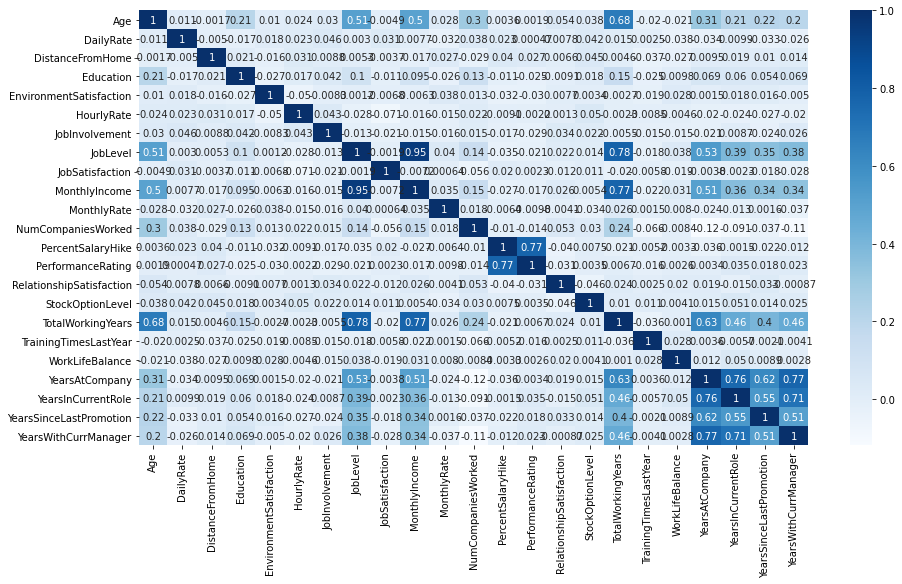

In [15]:
fig=plt.figure(figsize=(15,8))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [17]:
ds['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [18]:
ds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# replacing categorical value into numerical value whereever needed

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','MaritalStatus','OverTime']
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))

In [20]:
ds.describe()

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       1470.000000  1470.000000     1470.000000              1470.000000   
mean           9.192517     2.912925        2.247619                 2.721769   
std            8.106864     1.024165        1.331369                 1.093082   
min            1.000000     1.000000        0.000000                 1.000000   
25%            2.000000     2.000000        1.000000                 2.000000   
50%            7.000000     3.000000        2.000000                 3.000000   
75%           14.000000     4.000000        3.000000                 4.000000   
max           29.000000     5.000000        5.000000                 4.000000   

            Gender  ...  PerformanceRating  RelationshipSatisfaction  \
count  1470.000000  ...        1470.000000               1470.000000   
mean      0.600000  ...           3.153741                  2.712245   
std       0.490065  ...           0.360824                  1.081209   
min       0.000000  ...           3.000000                  1.000000   
25%       0.000000  ...           3.000000                  2.000000   
50%       1.000000  ...           3.000000                  3.000000   
75%       1.000000  ...           3.000000                  4.000000   
max       1.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 31 columns]

now here we can all of our value in numerical form

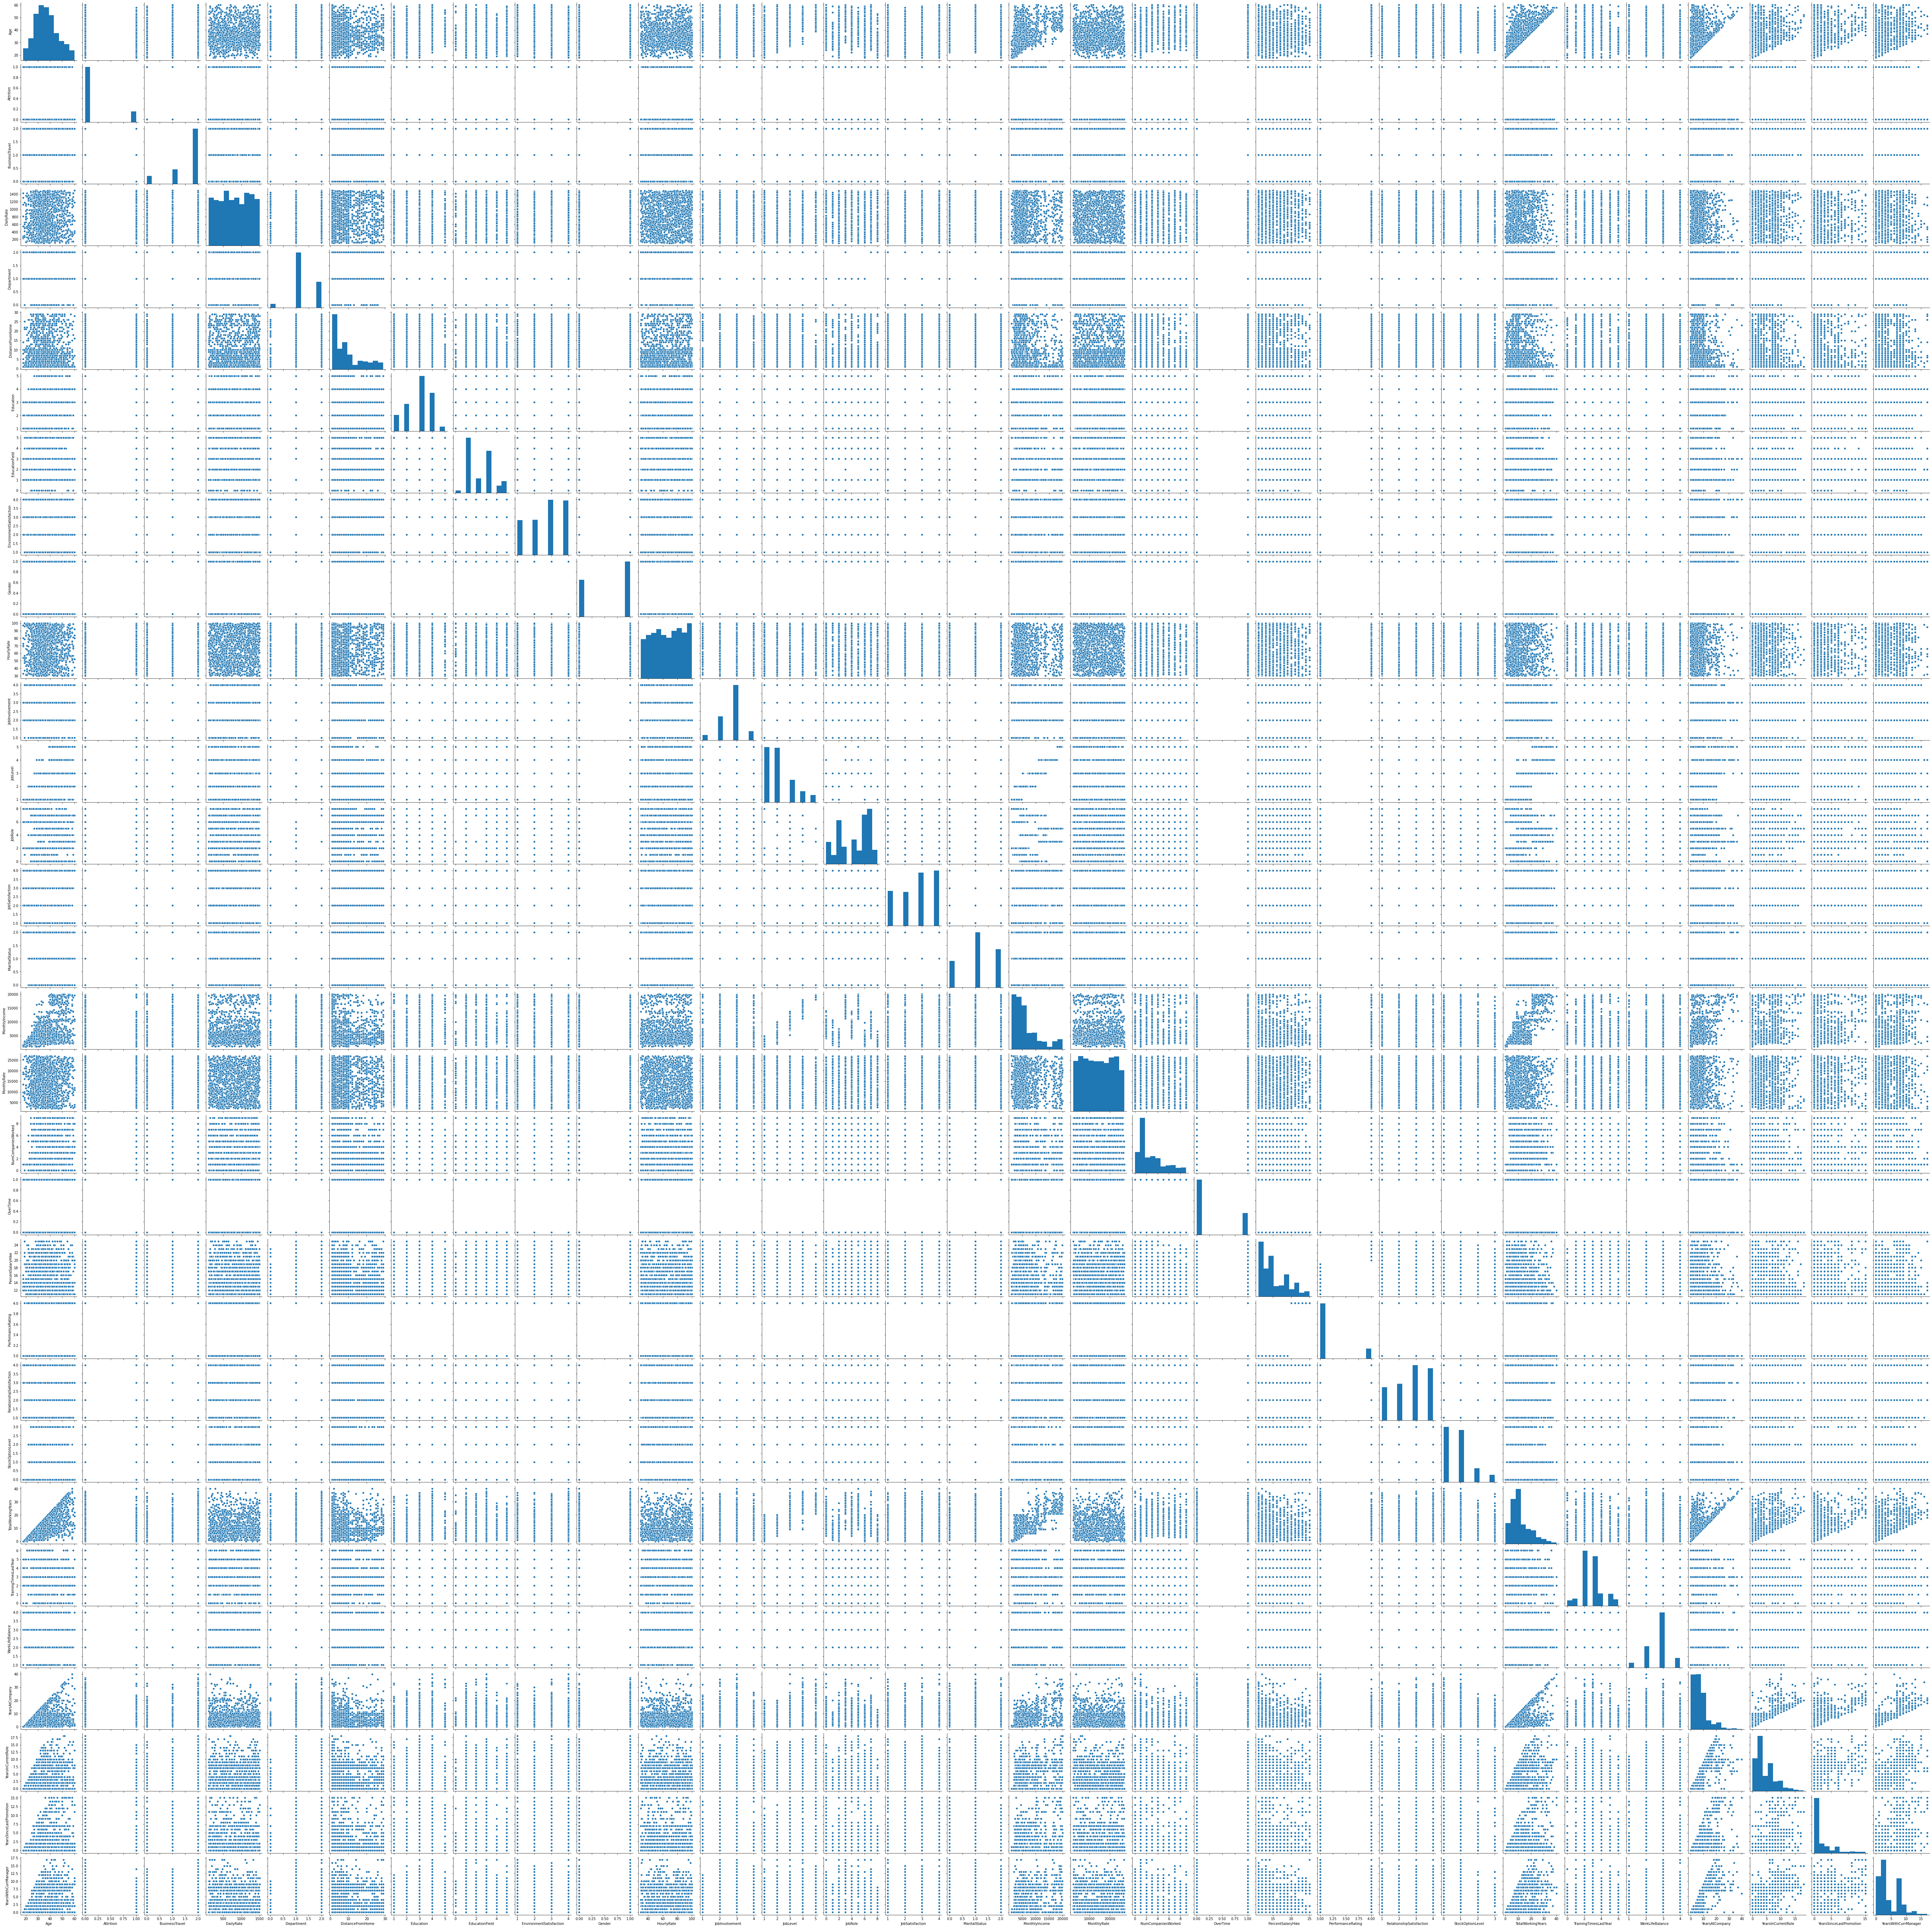

In [21]:
sns.pairplot(ds)

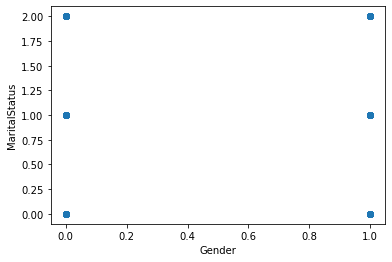

In [22]:
plt.scatter(ds.Gender,ds.MaritalStatus)
plt.xlabel('Gender')
plt.ylabel('MaritalStatus')
plt.show()

In [23]:
ds.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [24]:
from sklearn.preprocessing import power_transform
df_x=power_transform(ds)

df_x=pd.DataFrame(df_x,columns=ds.columns)

In [25]:
df_x.skew()

Age                        -0.007603
Attrition                   1.844366
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
Y

we remove the skewness of the data by power transform

In [26]:
df_x=ds

# checking for outliers

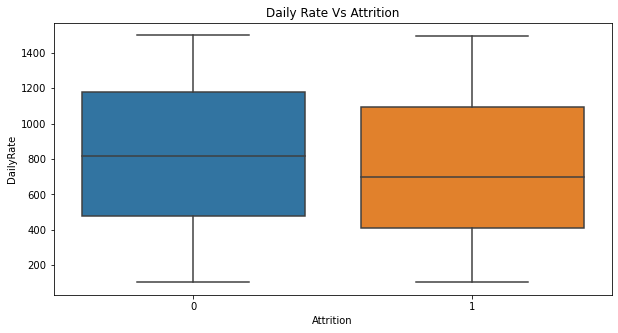

In [27]:
plt.figure(figsize=(10,5))
plt.title("Daily Rate Vs Attrition")
sns.boxplot(y = 'DailyRate',x='Attrition',data=ds)

we can see that people less daily rate have higher chances of attrition

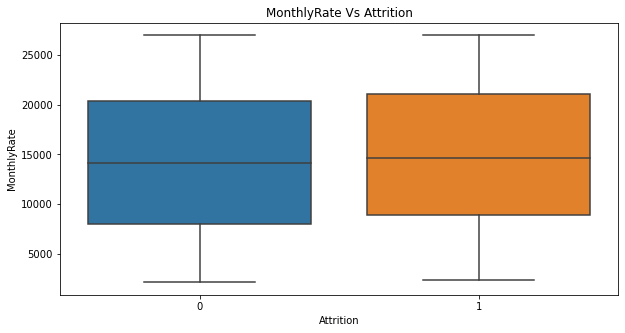

In [28]:
plt.figure(figsize=(10,5))
plt.title("MonthlyRate Vs Attrition")
sns.boxplot(y = 'MonthlyRate',x='Attrition',data=ds)

we can see that there is no evident relation between monthly rates and attrition

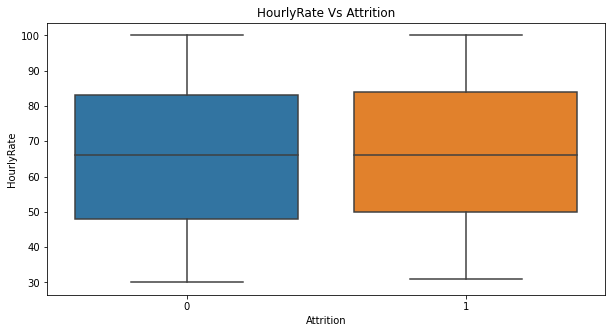

In [29]:
plt.figure(figsize=(10,5))
plt.title("HourlyRate Vs Attrition")
sns.boxplot(y = 'HourlyRate',x='Attrition',data=ds)

In this also no evident relation is showng between them

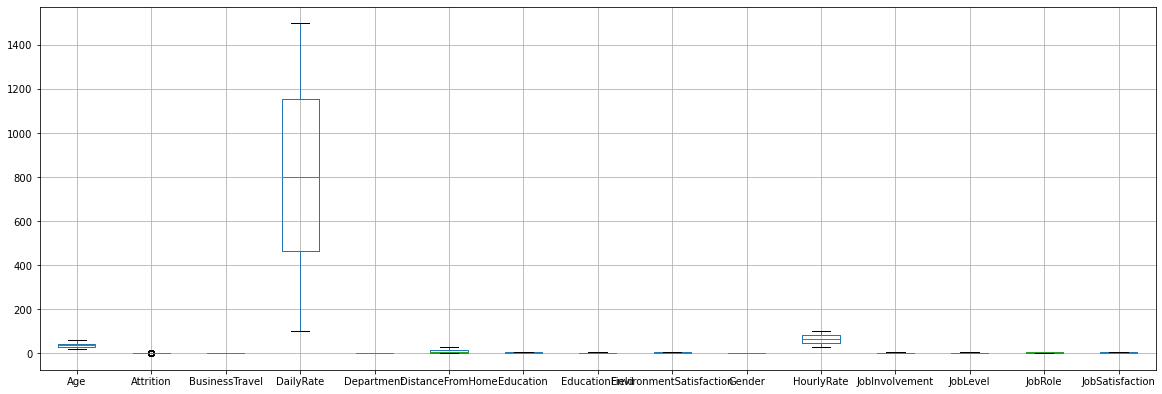

In [31]:
#plotting boxplotsfor first 15 columns
ds.iloc[:,0:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

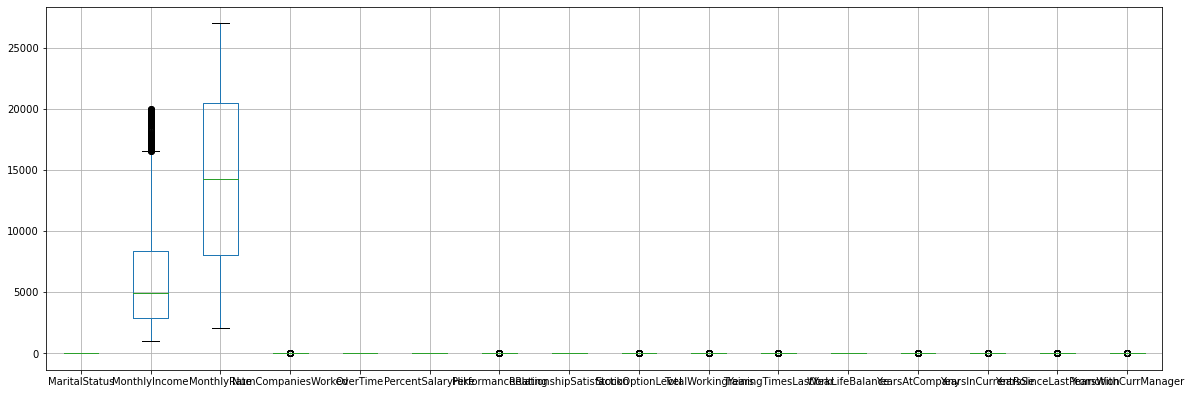

In [32]:
#plotting boxplotsfor rest of the  columns
ds.iloc[:,15:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

we can see here outliers are present in monthly income so we have to remove those outliers by zscore

In [34]:
from scipy.stats import zscore
zscr=np.abs(zscore(ds))

threshold=3
print(np.where(zscr>3))


(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [35]:
zscr[28][30]

3.6100788863016295

In [36]:
zscr[62][29]

3.3564494722225446

In [37]:
zscr[1430][28]

3.249878181909428

In [38]:
print("shape before removing the outliers:",ds.shape)

dsnew=ds[(zscr<3).all(axis=1)]

print("shape after removing the outliers:",dsnew.shape)

shape before removing the outliers: (1470, 31)
shape after removing the outliers: (1387, 31)


so we can see in here outliers are removed now

# Finding best random_state

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [42]:
x=ds.iloc[:,0:-1]
x.shape

(1470, 30)

In [43]:
y=ds.iloc[:,-1]
y.shape

(1470,)

In [44]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is",maxAccu,"on random_state",maxRS)

best accuracy is 0.2789115646258503 on random_state 103


# Creating train-test split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=103)

# Model Building

In [46]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.2789115646258503
[[  4   0  64   0   0   0   0   6   0   5   1   0   0   0   0   0   0]
 [  0   0  24   0   0   0   0   5   0   0   1   0   0   0   0   0   0]
 [  2   0 108   0   0   0   0   4   0   2   1   0   0   0   0   0   0]
 [  1   0  34   0   0   0   0   5   0   0   0   0   0   0   0   0   0]
 [  1   0  19   0   0   0   0   4   0   0   1   0   0   0   0   0   0]
 [  0   0   6   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   3   0   0   0   0   1   0   1   1   0   0   0   0   0   0]
 [  2   0  47   0   0   0   0  10   0   2   2   0   0   0   0   0   0]
 [  1   0  20   0   0   0   0   8   0   2   0   0   0   0   0   0   0]
 [  1   0   8   0   0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   4   0   0   0   0   1   0   0   1   0   0   0   0   0   0]
 [  0   0   4   0   0   0   0   3   0   1   1   0   0   0   0   0   0]
 [  1   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0   2   0   0   0   0 

In [47]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
preddt=DTC.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.4467120181405896
[[63  3  5  2  2  0  0  2  0  0  3  0  0  0  0  0  0]
 [ 4  0  9  6  1  3  1  4  2  0  0  0  0  0  0  0  0]
 [ 7  9 71 19  6  2  0  0  1  2  0  0  0  0  0  0  0]
 [ 1  4  5 19  8  1  0  1  1  0  0  0  0  0  0  0  0]
 [ 2  2  7  5  7  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  2  0  0  0  2  1  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  1  0  0  2  0  0  0  0  0  0  0  1  0]
 [ 7  0  2  4  2  3  3 26  9  2  2  1  0  2  0  0  0]
 [ 3  3  2  0  0  0  0  6  9  2  1  3  0  0  0  1  1]
 [ 0  0  0  0  0  0  3  3  4  0  1  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  1  2  0  1  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  2  1  2  0  1  0  1  1  0  0]
 [ 0  0  0  0  0  0  0  2  1  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  2  0  0  0]]
              precision    recall  f1-score   support

       

In [48]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.546485260770975
[[65  0  5  3  2  0  0  3  1  1  0  0  0  0  0  0  0]
 [ 3  0 12  5  0  0  0  6  2  2  0  0  0  0  0  0  0]
 [ 0  0 95 16  3  0  0  1  1  1  0  0  0  0  0  0  0]
 [ 0  0 18 17  3  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  8  2  0  0  3  1  0  0  0  0  0  0  0  0]
 [ 1  0  1  2  0  0  0  1  2  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  2  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0 52  8  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19  8  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  6  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  4  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  3  3  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

        

In [49]:
AD=AdaBoostClassifier()
AD.fit(x_train,y_train)
predad=AD.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.39909297052154197
[[53  0 12 14  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 3  0 17  5  0  0  0  0  4  1  0  0  0  0  0  0  0]
 [ 0  0 96 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25 14  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0 22  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  3  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  2  1  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0 36 15  0  0  0  0  8  4  0  0  0  0  0  0  0]
 [ 0  0 18  3  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  4  1  0  0  0  0  5  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

      

from all of the above model we can see that RandomForest have the best accuracy_score(54%)but it can be due to overfitting sowe go for cross validation score

# Cross_validation_score

In [50]:
scr=cross_val_score(LR,x,y,cv=5)
print('cross validation score of logisticregression is :',scr.mean())
print(scr.std())

cross validation score of logisticregression is : 0.23809523809523808
0.012357756547336705


In [51]:
scr=cross_val_score(DTC,x,y,cv=5)
print('cross validation score of Decisiontreeclassifier is :',scr.mean())
print(scr.std())

cross validation score of Decisiontreeclassifier is : 0.4537414965986394
0.019551167160816216


In [52]:
scr=cross_val_score(RF,x,y,cv=5)
print('cross validation score of RandomForestclassifier is :',scr.mean())
print(scr.std())

cross validation score of RandomForestclassifier is : 0.5149659863945579
0.019313019818474022


In [53]:
scr=cross_val_score(AD,x,y,cv=5)
print('cross validation score of AdaBoostclassifier is :',scr.mean())
print(scr.std())

cross validation score of AdaBoostclassifier is : 0.363265306122449
0.055156603539114245


# Hyper Parameter Tunning

In [58]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2,15),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

In [59]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [60]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [61]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt'}

In [62]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [63]:
accuracy_score(y_test,GCV_pred)

0.5510204081632653

# Saving the Model

In [64]:
import joblib
joblib.dump(RF,'RandomForestClassifierModel.obj')

['RandomForestClassifierModel.obj']

In [66]:
RF=joblib.load('RandomForestClassifierModel.obj')
RF.predict(x_train)

array([8, 5, 8, ..., 0, 0, 0], dtype=int64)